In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as stats

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as nn

In [2]:
def reader(file_name):
    list_obj = list()
    with open(file_name, 'r') as fd_file:
        i = 0;
        for line in fd_file:
            line = line.split()
            coords = np.zeros(shape=(3,))
            coords[0] = float(line[0])
            coords[1] = float(line[1])
            coords[2] = float(line[2])
            i += 1
            list_obj.append(coords)            
    return np.array(list_obj)

In [57]:
mas = reader('r 0.05 0.075 xyz.txt')

In [58]:
mas.shape


(123930, 3)

In [59]:
nbrs = nn(n_neighbors=5, algorithm='ball_tree').fit(mas)

In [60]:
dist, ind = nbrs.kneighbors(mas)

In [61]:
dist

array([[0.        , 0.29769383, 0.61300228, 0.93963691, 1.25339783],
       [0.        , 1.31813895, 1.3252784 , 1.35043802, 1.42373625],
       [0.        , 0.45136972, 0.50592712, 0.64900894, 0.72375605],
       ...,
       [0.        , 3.56151365, 6.20731244, 7.50494963, 8.37460829],
       [0.        , 4.5788826 , 6.13234241, 6.60895813, 7.27387788],
       [0.        , 3.89370284, 5.51675001, 5.68965301, 5.85999727]])

In [62]:
dist_to_4 = dist[:,4]

In [63]:
dist_to_4.shape

(123930,)

In [64]:
dist_to_4[dist_to_4==0]

array([], dtype=float64)

In [80]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(dist_to_4)

In [87]:
print(fit_alpha, fit_loc, fit_beta)

0.06344615452390556 0.20132159653303378 4.556558797674661


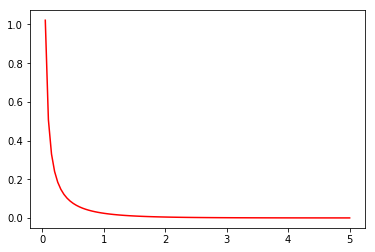

In [106]:
#y = gamma.rvs(fit_alpha, fit_loc, fit_beta, size=size)
x_fit = np.linspace(0, 5, 100)
#param = gamma.fit(y, floc=0)
pdf_fitted = stats.gamma.pdf(x_fit, fit_alpha)
plt.plot(x_fit, pdf_fitted, color='r')
#plt.xlim(0, 5)

In [92]:
pdf_fitted


array([0.04510275, 0.03775125, 0.09759128, ..., 0.0013855 , 0.00202001,
       0.00339492])

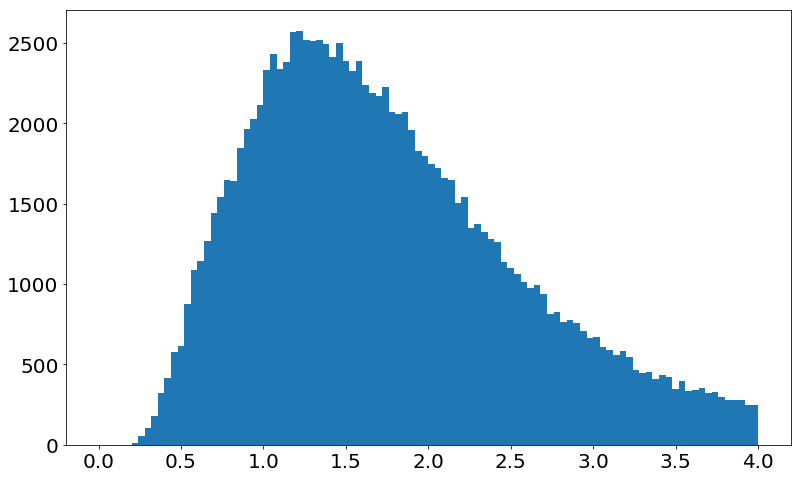

In [97]:
fig = plt.figure(figsize=(13, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

num = plt.hist(dist_to_4, 100, [0, 4])

In [18]:
dist_not_zero = dist[dist!=0]

In [27]:
dist_not_zero[]

array([0.01956224, 0.02521089, 0.02551765, ..., 1.09694955, 1.20579458,
       1.39562228])

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  442.,  365.,
         447.,  411.,  382.,  430.,  438.,  445.,  488.,  490.,  469.,
         482.,  512.,  533.,  514.,  536.,  635.,  572.,  542.,  607.,
         649.,  674.,  677.,  665.,  608.,  698.,  621.,  669.,  760.,
         758.,  758.,  730.,  755.,  813.,  783.,  781.,  847.,  856.,
         911.,  832.,  855.,  787.,  904.,  913.,  856.,  947., 1024.,
         933.,  965.,  971.,  951.,  994., 1002., 1016., 1109., 1037.,
        1055., 1107., 1163., 1040., 1073., 1123., 1105., 1163., 1084.,
        1119., 1147., 1204., 1172., 1220., 1276., 1136., 1232., 1105.,
        1142., 1217., 1312., 1193., 1172., 1183., 1142., 1269., 1223.,
        1209., 1142., 1332., 1202., 1237., 1271., 1253., 1304., 1205.,
        1183., 1256., 1228., 1289., 1230., 1328., 1205., 1265., 1319.,
      

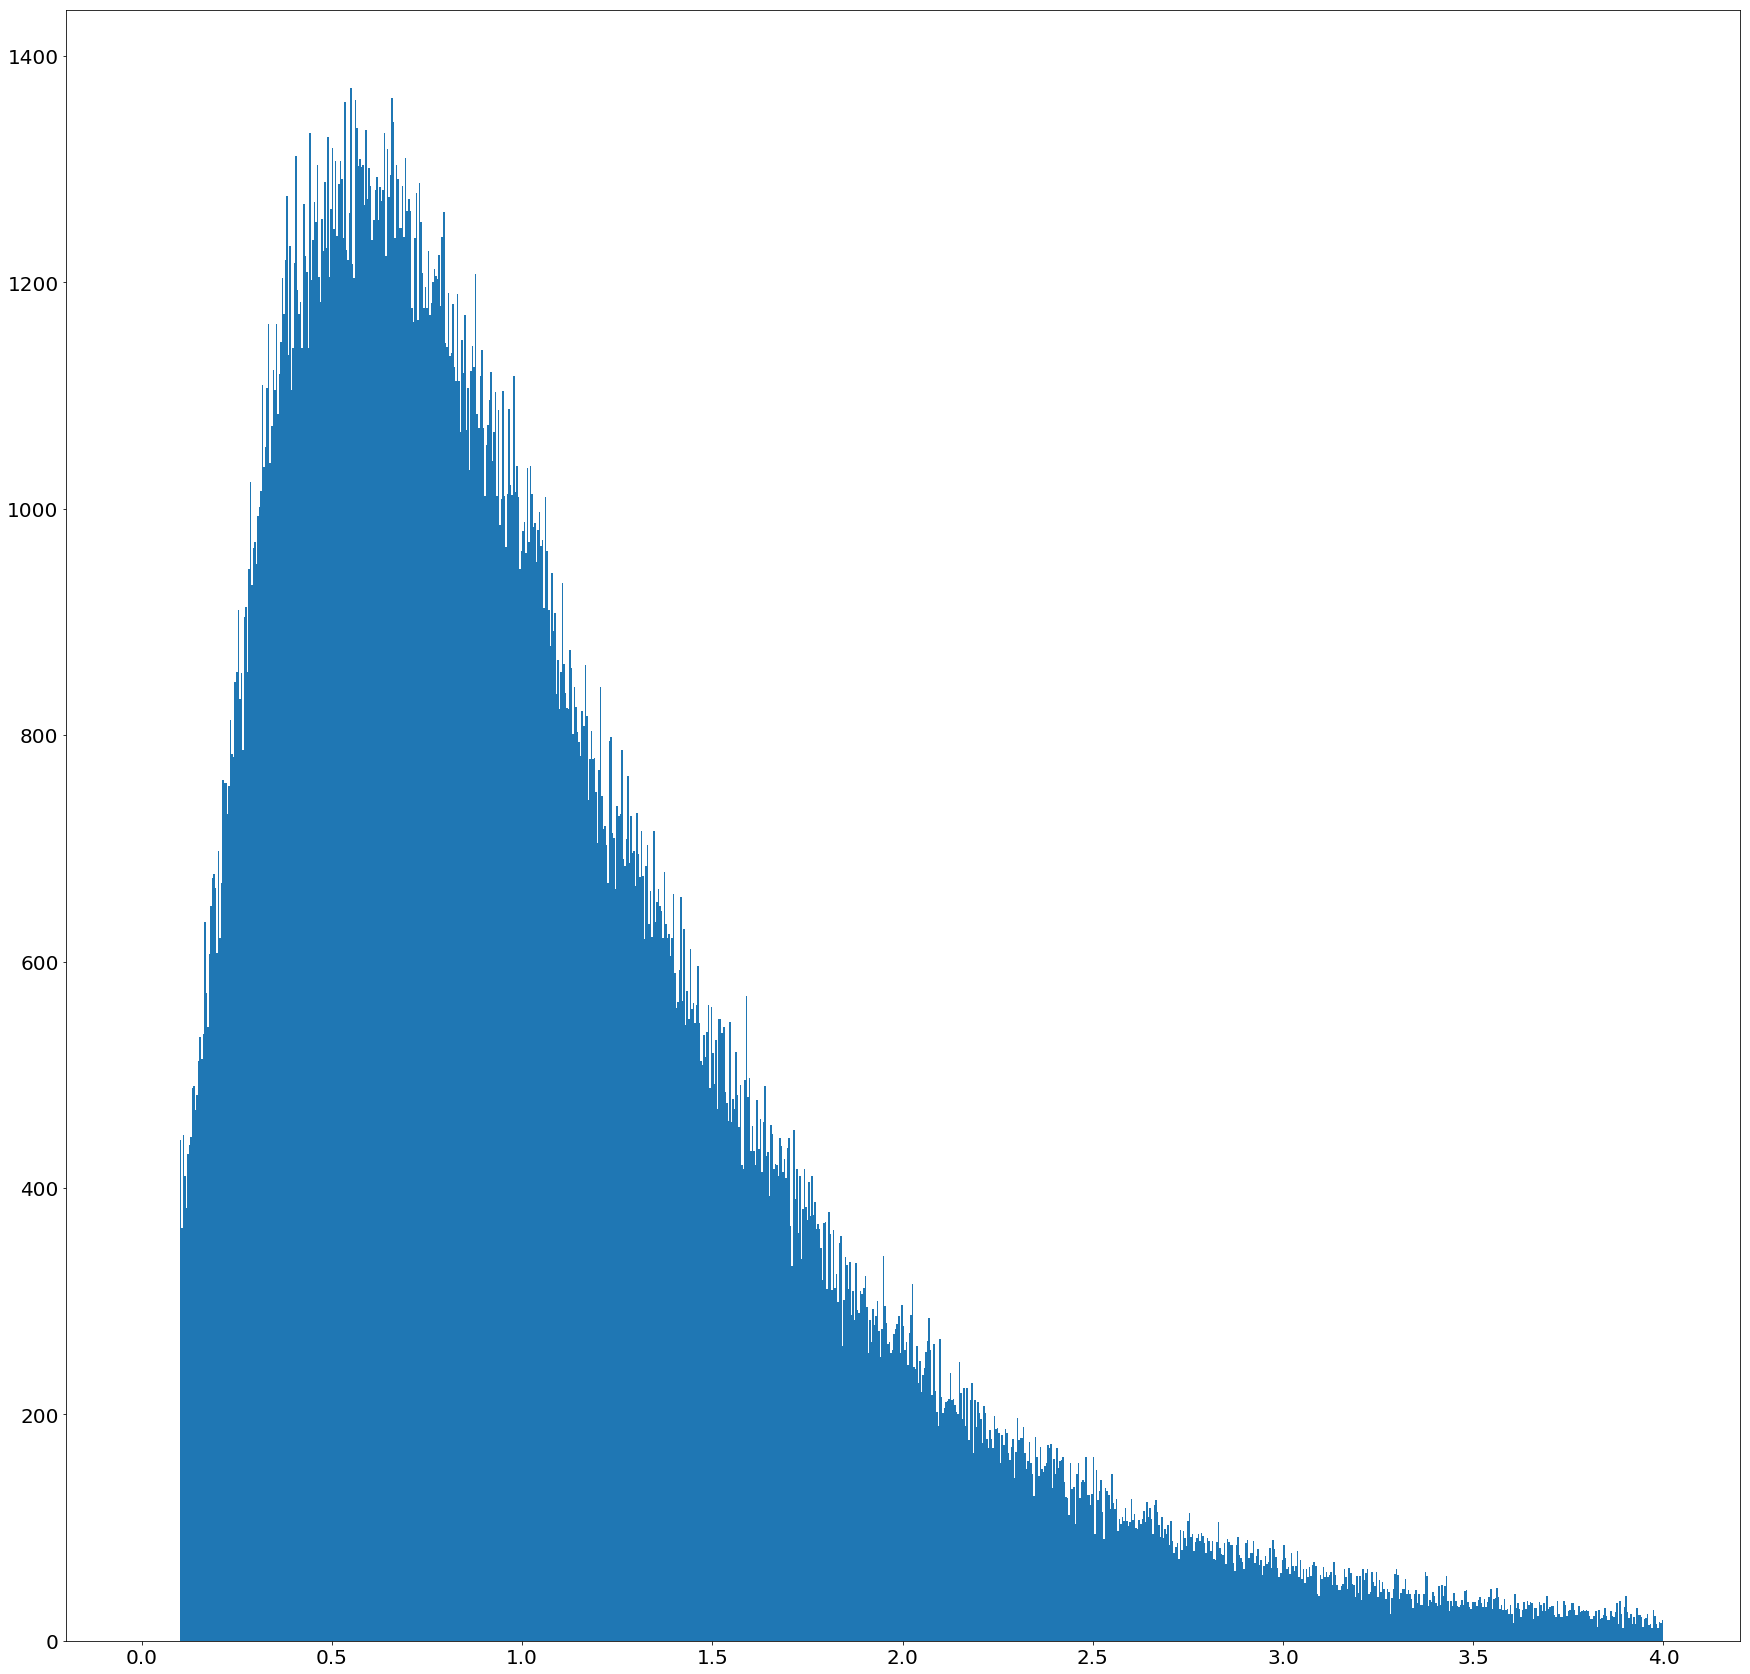

In [44]:

fig = plt.figure(figsize=(30, 30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.hist(dist_not_zero[dist_not_zero > 0.1], 1000, range=[0, 4])

(array([ 9462., 14291., 18822., 22662., 24019., 24905., 25036., 24778.,
        23462., 22103., 20708., 19702., 17875., 15850., 14339., 13401.,
        12145., 10710.,  9609.,  8893.,  7923.,  7186.,  6149.,  5533.,
         5146.,  4523.,  4027.,  3533.,  3240.,  2965.,  2648.,  2282.,
         2161.,  1777.,  1725.,  1547.,  1446.,  1267.,  1135.,  1007.,
          928.,   834.,   758.,   675.,   638.,   574.,   557.,   452.,
          464.,   362.]),
 array([0.1  , 0.178, 0.256, 0.334, 0.412, 0.49 , 0.568, 0.646, 0.724,
        0.802, 0.88 , 0.958, 1.036, 1.114, 1.192, 1.27 , 1.348, 1.426,
        1.504, 1.582, 1.66 , 1.738, 1.816, 1.894, 1.972, 2.05 , 2.128,
        2.206, 2.284, 2.362, 2.44 , 2.518, 2.596, 2.674, 2.752, 2.83 ,
        2.908, 2.986, 3.064, 3.142, 3.22 , 3.298, 3.376, 3.454, 3.532,
        3.61 , 3.688, 3.766, 3.844, 3.922, 4.   ]),
 <a list of 50 Patch objects>)

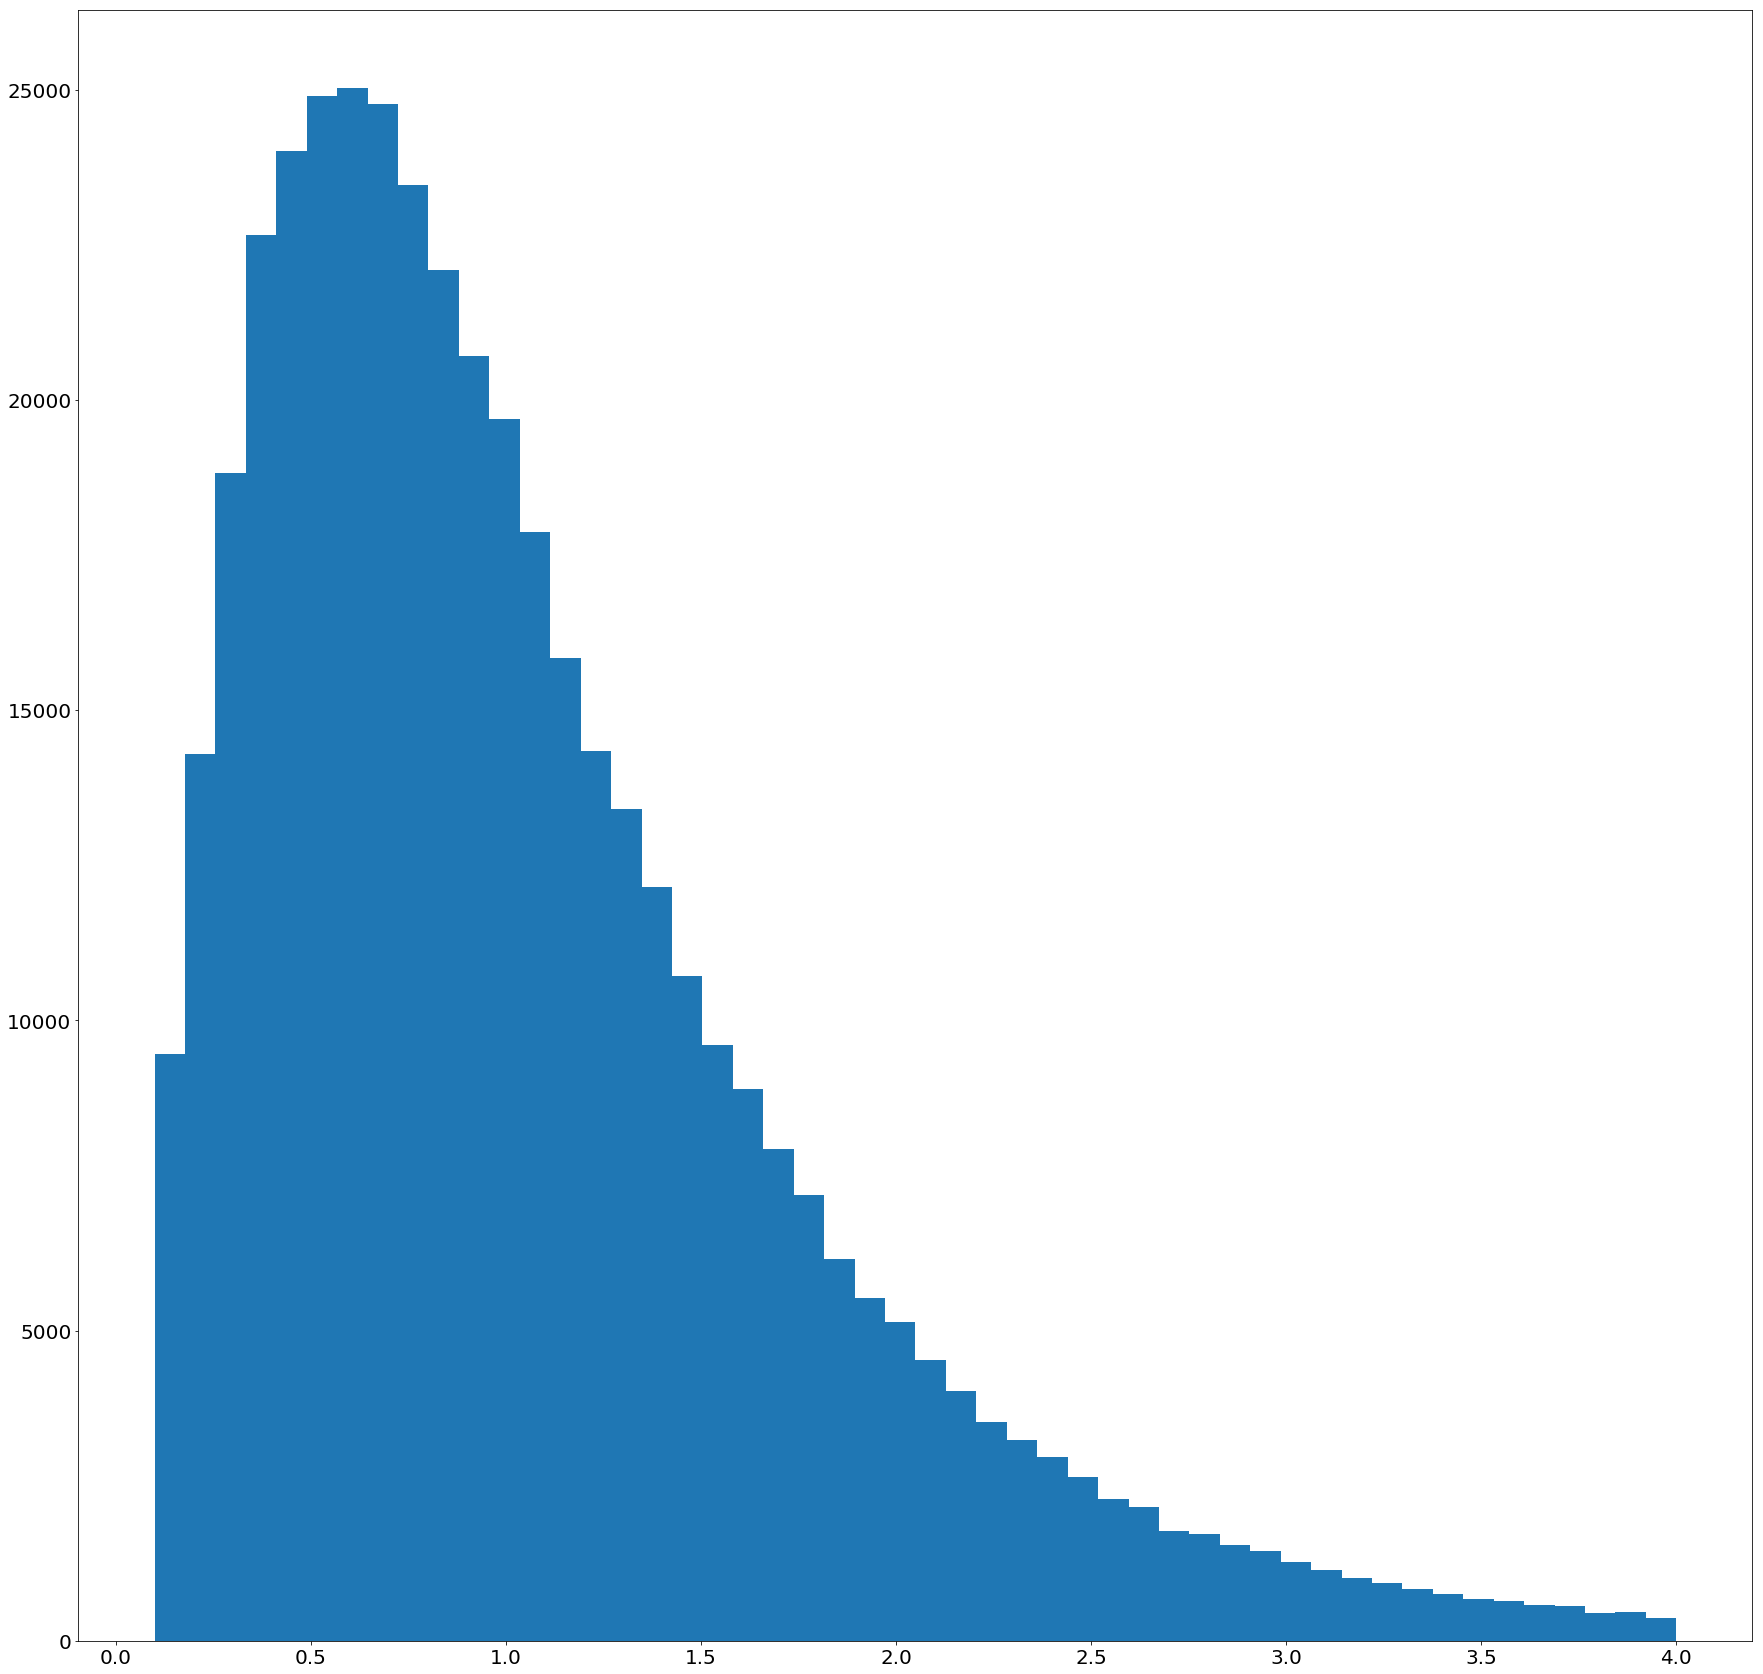

In [39]:

fig = plt.figure(figsize=(30, 30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.hist(dist_not_zero, 50, range=[0.1, 4])